## import dependencies

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import time
from tkinter import *
from tkinter import filedialog

## load file using the gui popup

In [2]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load timestamp csv')

%gui tk

In [3]:
df = pd.read_csv(infiles[0])
df.tail(50)

,Experiment_Start,"(6, 'Stim_Start')","(7, 'Stim_Start')","(8, 'Stim_Start')","(9, 'Stim_Start')","(10, 'Stim_Start')","(11, 'Stim_Start')","(12, 'Stim_Start')","(13, 'Stim_Start')","(14, 'Stim_Start')",...,"(41, 'Stim_Start')","(42, 'Stim_Start')","(43, 'Stim_Start')","(44, 'Stim_Start')","(45, 'Stim_Start')","(46, 'Stim_Start')","(47, 'Stim_Start')","(48, 'Stim_Start')","(49, 'Stim_Start')","(50, 'Stim_Start')"
0,1.696284e+09,1.696284e+09,1.696284e+09,1.696284e+09,1.696284e+09,1.696284e+09,1.696284e+09,1.696284e+09,1.696284e+09,1.696284e+09,...,1.696286e+09,1.696286e+09,1.696286e+09,1.696286e+09,1.696286e+09,1.696286e+09,1.696286e+09,1.696286e+09,1.696286e+09,1.696286e+09


## compute time elapsed (detectable behavior start times)

In [4]:
# fmt = '%Y%m%d_%H:%M:%S:%f'
stim_time = []
tstamp_0 = df.iloc[0, 0]
print(tstamp_0)
for i in range(1, np.array(df).shape[1]):
#     print(i)
    try:
        
#         tstamp2 = datetime.strptime(np.array(df)[0, i], fmt)
        tstamp2 = np.array(df)[0, i]
        time_elapsed = tstamp2-tstamp_0
        stim_time.append(time_elapsed)
    except:
        pass
print(stim_time)

1696283716.8007624
[157.6913561820984, 158.45830607414246, 164.35890936851501, 165.6086242198944, 166.20303606987, 172.23409914970398, 191.7395043373108, 260.0224597454071, 260.3158359527588, 329.09804034233093, 329.5947597026825, 333.35419511795044, 335.5625796318054, 338.3792588710785, 421.77010798454285, 422.84428238868713, 616.0102200508118, 713.2108314037323, 713.6439485549927, 726.683260679245, 859.274040222168, 930.7316491603851, 931.1958038806915, 1029.0658218860626, 1153.5156784057617, 1175.2280735969543, 1175.8354995250702, 1436.028926372528, 1509.932772397995, 1595.0691421031952, 1626.4768590927124, 1844.1677911281586, 1919.7540106773376, 1951.0199174880981, 1968.382560968399, 2040.5051305294037, 2042.5579936504364, 2049.4541561603546, 2050.5718138217926, 2052.0128769874573, 2052.7786276340485, 2053.05389213562, 2138.450579881668, 2210.7826058864594, 2211.2732944488525]


(0.0, 2211.2732944488525)

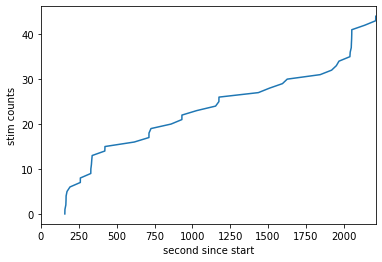

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.array(stim_time), np.arange(len(stim_time)))
ax.set_ylabel('stim counts')
ax.set_xlabel('second since start')
# ax.vlines(np.where(np.array(stim_time) > 300)[0][0], 0, (np.array(stim_time)).max())
ax.set_xlim([0, (np.array(stim_time)).max()])

### plot, and save

In [6]:
# optional
np.save('D:\Jack\Project\P16/102422/realtime_trial1_orientL.npy', np.array(stim_time))

PermissionError: [Errno 13] Permission denied: 'D:\\Jack\\Project\\P16/102422/realtime_trial1_orientL.npy'

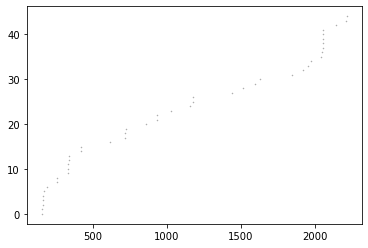

In [7]:
plt.scatter(stim_time, np.arange(len(stim_time)), c='k', s=0.3, alpha=0.3)

In [8]:
# bin by bin_size seconds
bin_size = 900
bin_start = np.arange(0, np.max(stim_time), bin_size)
bin_end = np.arange(bin_size, np.max(stim_time)+bin_size, bin_size)
print(bin_start, bin_end)
stim_binned_counts = []
for b in range(len(bin_start)):
    stim_binned_counts.append(len(np.where((stim_time >= bin_start[b]) & (stim_time < bin_end[b]))[0]))

[   0.  900. 1800.] [ 900. 1800. 2700.]


## generating a figure and saving it

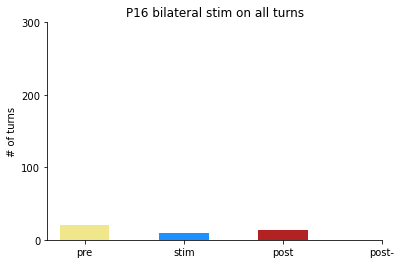

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
exp_paradigm = ['pre', 'stim', 'post', 'post-']
paradigm_colors = ['khaki', 'dodgerblue', 'firebrick', 'firebrick']
# bar(x, y)
ax.bar(np.arange(len(stim_binned_counts)),
       stim_binned_counts, color=paradigm_colors, width=0.5)
ax.set_title('P16 bilateral stim on all turns')
ax.set_ylabel('# of turns')
# ax.xlabel(f'bin number ({bin_size} sec)')
ax.set_xticks(np.arange(0, 4))
ax.set_xticklabels(exp_paradigm)
ax.set_yticks(np.arange(0, 301, 100))
ax.spines[['right', 'top']].set_visible(False)

In [34]:
fig.savefig('../temp_figures/p16_011223_realtime.png', dpi=600)

In [13]:
print(f'animal performs this behavior around {np.mean(stim_binned_counts)/bin_size}Hz')

animal performs this behavior around 0.24944444444444444Hz
